In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits import mplot3d

<h1>
    1.  Import the first Sylvester Stallone image and display it next to the T-Swift image.
</h1>


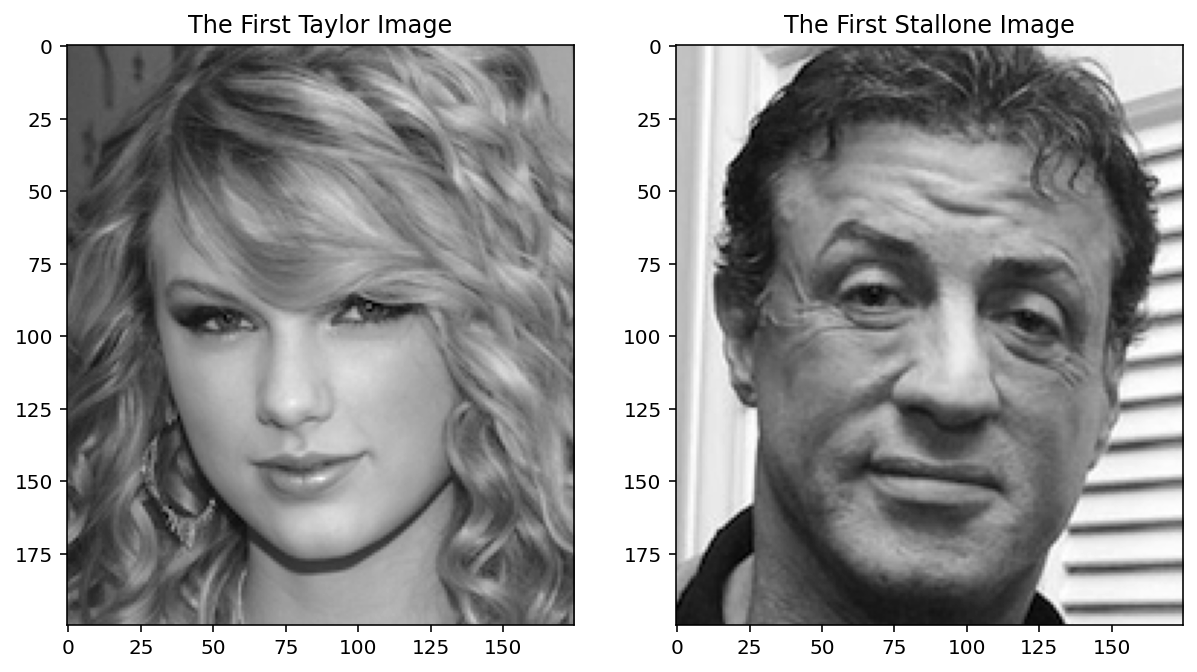

In [21]:
# all images are 200 x 175 pixels
# you can view one by loading it into Python and showing it with imshow

# import images
firstTaylorImage = cv2.imread(f'./faces/taylor01.jpg',cv2.IMREAD_GRAYSCALE).astype(float)
firstStalloneImage = cv2.imread(f'./faces/stallone01.jpg',cv2.IMREAD_GRAYSCALE).astype(float)

#Display images syde by side
fig, axes = plt.subplots(1,2,figsize=(10, 8.75))
axes[0].imshow(firstTaylorImage, cmap='gray')
axes[0].set_title('The First Taylor Image')

axes[1].imshow(firstStalloneImage, cmap='gray')
axes[1].set_title('The First Stallone Image')
plt.show()

<h1>
    2. 
</h1>
Imports all 20 images of Swift and Stallone and stores it in a single array called "B"

When we import all $20\times 2 = 40$ images totally into a single array "B", each images is flattened into a vector . Since the images are all $200\times 175$ pixels, each image has a vector length of 35,000. We have 40 images in total, so these vectors result in an array B of dimensions of 1,400,000 (from $35,000\times 40$)

In [17]:
# load all the data into a single array
B = np.zeros((35000,40))

for i in range(1, 21):
    taylor = cv2.imread(f'./faces/taylor{i:02d}.jpg', cv2.IMREAD_GRAYSCALE).astype(float)
    sylvester = cv2.imread(f'./faces/stallone{i:02d}.jpg', cv2.IMREAD_GRAYSCALE).astype(float)

    # Flatten the images and store in the matrix B
    B[:, i - 1] = taylor.flatten()
    B[:, 20 + i - 1] = sylvester.flatten()

<h1>
    3.
</h1>

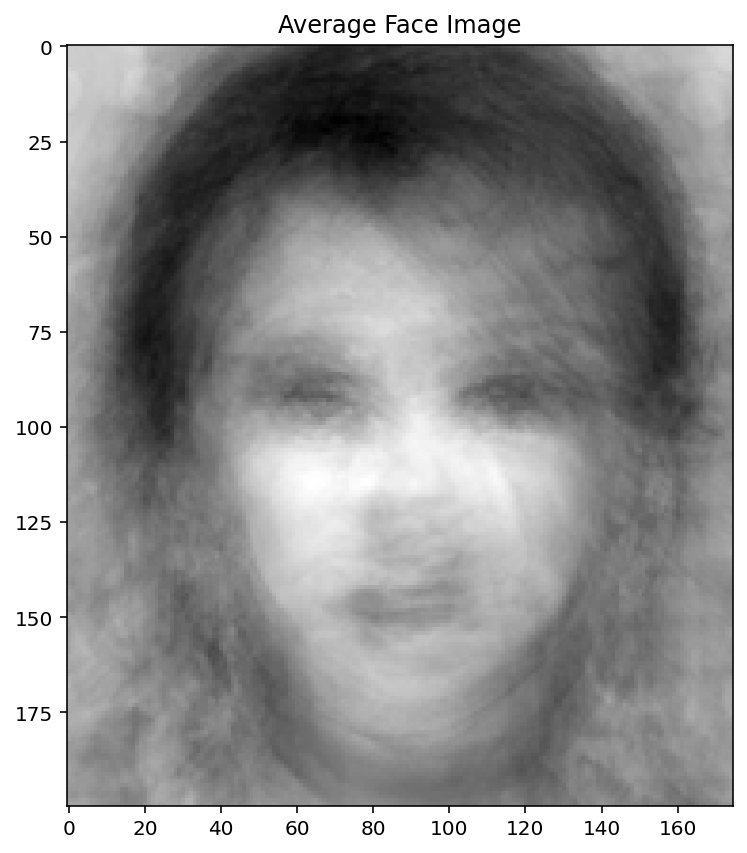

In [24]:
# Calculate mean face, each column is a flattened face image
mean_face = np.mean(B, axis = 1)

# Reshape mean face and display
mean_face_image = mean_face.reshape(200,175)
plt.imshow(mean_face_image, cmap='gray')
plt.title('Average Face Image')
plt.show()

<h1>
    4.
</h1>

In the plot, the singular values from the SVD function is typically a decreasing pattern where the first few values are significantly larger thant the others, seriously between 0 and 5. This probably indicates that these initial components are capturing the majority of the variance in the image data.

It appears that hte first singular, index 0, is much larger than all of others, which suggests that as we move to higher index values, the singular values decrease.

It's hard to tell exactly how many "large" magnitude, but usually, the initial few singular values are much larger than the rest. From the plot, personaly, I prefer to say the first 4, which are larger than 15000.

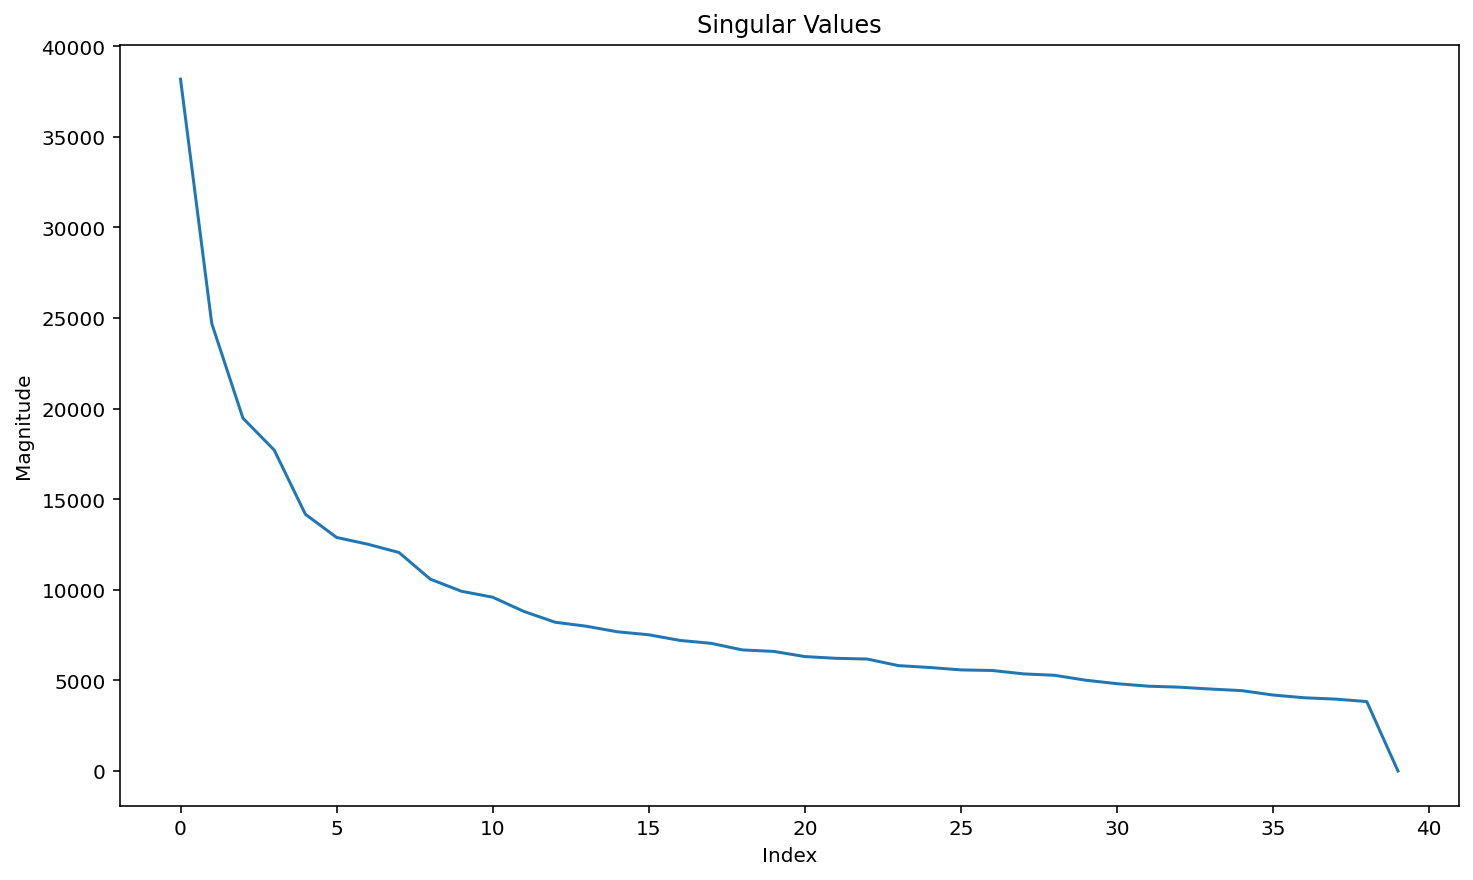

In [27]:
# Subtract the average face
B_deviation = B - mean_face[: ,np.newaxis] # transforms mean_face into a column vector


# SVD
U, S, Vt = np.linalg.svd(B_deviation, full_matrices=False)

# Plot singular values
plt.plot(S)
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.show()

# 5. - 6.

In the 3D plot, each point represents a face image is defined by the first three singular vectors  from the SVD of the face images dataset, and they are projected onto the three-dimensional space. The red points are Taylor Swift images, while the blue points represent Sylvester Stallone images.

From the plot, there's a separation between the red and blue points, indicating that the space defined by the first 3 singular vectors captures some of the differences between the two groups of images. Those captured features that are sufficiently distinct between the images of Taylor and Sylvester, allowing for a classification to distinguish between images of the two individuals based on their projections onto this three-dimensional space. Taylor Swift's images cluster in one region, while Sylvester Stallone's images tend to group in another. 

Indeed, the SVD help use to reduce the data dimensionality while preserving the features for differentiating images.

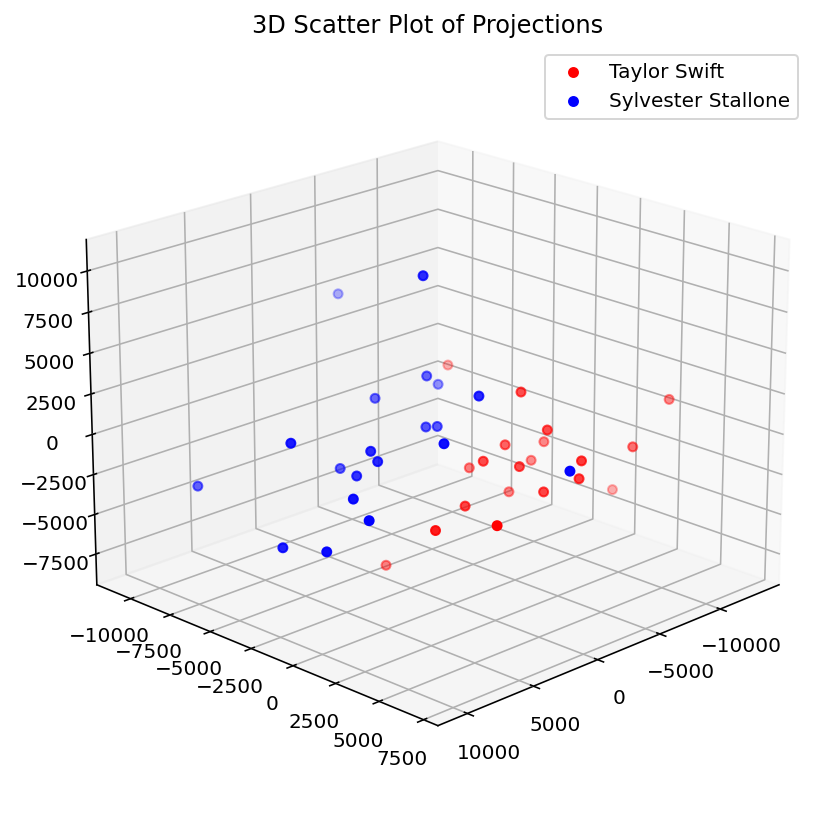

In [29]:
# 5. 
u1, u2, u3 = U[:, 0], U[:, 1], U[:, 2]
x = np.dot(u1, B_deviation)
y = np.dot(u2, B_deviation)
z = np.dot(u3, B_deviation)



# 6. 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[0:20], y[0:20], z[0:20], color='red', label='Taylor Swift')
ax.scatter(x[20:], y[20:], z[20:], color='blue', label='Sylvester Stallone')
ax.view_init(elev = 20,azim = 45)
ax.set_title('3D Scatter Plot of Projections')
ax.legend()
plt.show()

# 7.

I guess that the mystery is Sylvester Stallone image since the green point appears in the group of blue ones.

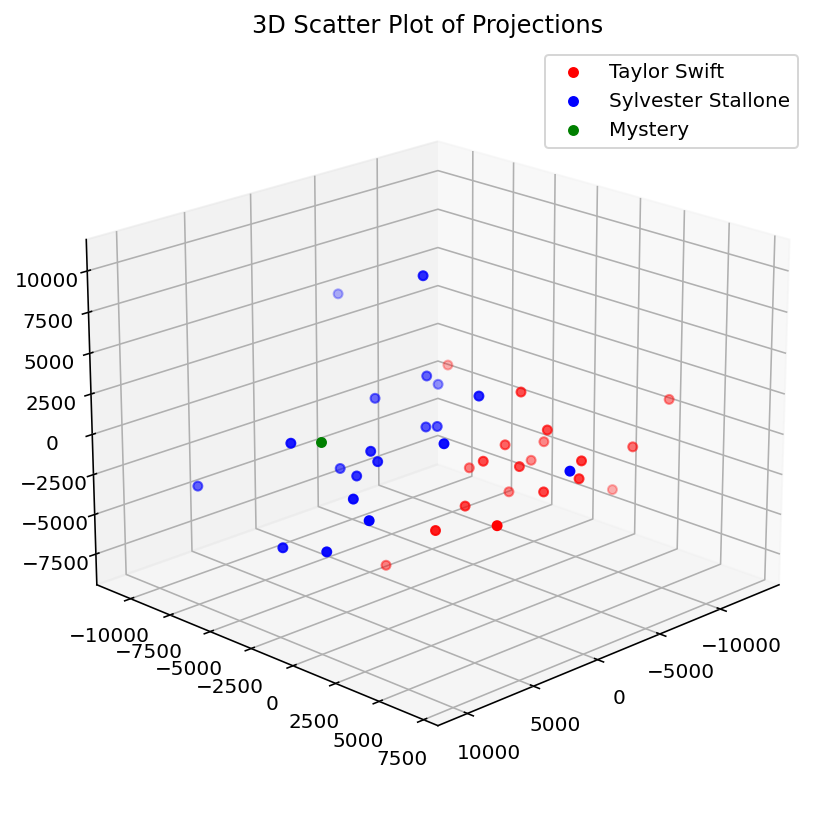

In [31]:
# 7. 
mystery_image = cv2.imread(f'./faces/mystery.jpg', cv2.IMREAD_GRAYSCALE).flatten()
mystery_deviation = mystery_image - mean_face
mystery_x = np.dot(u1, mystery_deviation)
mystery_y = np.dot(u2, mystery_deviation)
mystery_z = np.dot(u3, mystery_deviation)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[0:20], y[0:20], z[0:20], color='red', label='Taylor Swift')
ax.scatter(x[20:], y[20:], z[20:], color='blue', label='Sylvester Stallone')
ax.scatter(mystery_x, mystery_y, mystery_z, color = 'green', label = "Mystery") # Add mystery image
ax.view_init(elev = 20,azim = 45)
ax.set_title('3D Scatter Plot of Projections')
ax.legend()
plt.show()